# Benchmarking computation of solid angle for triangular aperture

From [wikipedia](https://en.wikipedia.org/wiki/Solid_angle#Tetrahedron):

Let OABC be the vertices of a tetrahedron with an origin at $O$ subtended by the triangular face $ABC$ where $\vec a\ ,\, \vec b\ ,\, \vec c$ are the vector positions of the vertices $A$, $B$ and $C$. Define the vertex angle $\theta_a$ to be the angle $BOC$ and define $\theta_b$, $\theta_c$ correspondingly. Let $\phi_{ab}$ be the dihedral angle between the planes that contain the tetrahedral faces $OAC$ and $OBC$ and define $\phi_{ac}$, $\phi_{bc}$ correspondingly. The solid angle $\Omega$ subtended by the triangular surface $ABC$ is given by

$$
\Omega = \left(\phi_{ab} + \phi_{bc} + \phi_{ac}\right)\ - \pi\
$$

In ``tofu`` we have the coordinates of the points $O$, $A$, $B$, and $C$. If we want to compute the solid angle this ways, we would have to compute the dihedral angles $\phi_{ab}$, $\phi_{bc}$, and $\phi_{ac}$ first. To do so, the computation of the latter is described as such:

\[...\] if $\mathbf{n}_A$ and $\mathbf{n}_B$ are normal vector to the planes (defining the angle), one has:

$$\cos \varphi =  \frac{ \left\vert\mathbf{n}_\mathrm{A} \cdot \mathbf{n}_\mathrm{B}\right\vert}{|\mathbf{n}_\mathrm{A} | |\mathbf{n}_\mathrm{B}|}$$

where $\mathbf{n}_A \cdot \mathbf{n}_B$ is the dot product of the vectors and $|\mathbf{n}_\mathrm{A} | |\mathbf{n}_\mathrm{B}|$ is the product of their lengths.

The absolute value is required in above formulas, as the planes are not changed when changing all coefficient signs in one equation, or replacing one normal vector by its opposite.


## Example of computation with original formula

Let's generate four arbitrary points in space and compute the solid angle on the triangle using this formula

In [36]:
import numpy
from mpl_toolkits import mplot3d

In [76]:
# We create randomly the coordinates of A, B, C
coord = numpy.random.randint(-10, 10, size=(3, 4)) + 0.0
# We set O to orign
coord[:, 0] = 0
coord

array([[ 0.,  1., -5.,  1.],
       [ 0., -5.,  4., -1.],
       [ 0., -6.,  6.,  3.]])

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt

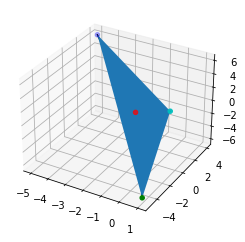

In [78]:
fig = plt.figure()
ax = plt.axes(projection='3d')
coord[:, 0] = np.sum(coord[:, 1:], axis=1) / 3.
# we plot the origin in red, A in green, B in blue and C in cyan.
ax.plot_trisurf(coord[0, 1:], coord[1, 1:], coord[2, 1:], shade=False)
ax.scatter3D(coord[0], coord[1], coord[2], c=["r", "g", "b", "c"])
ax.plot([coord[0,0], coord[0,1]], [coord[1,0], coord[1,1]], [coord[2,0], coord[2,1]], c="black")
ax.plot([coord[0,0], coord[0,2]], [coord[1,0], coord[1,2]], [coord[2,0], coord[2,2]], c="black")
ax.plot([coord[0,0], coord[0,3]], [coord[1,0], coord[1,3]], [coord[2,0], coord[2,3]], c="black")

In [8]:
vectors = coord[:, 0, None] - coord[:, 1:]  # [OA; OB; OC]
vectors

array([[ 1,  3,  8],
       [-1, -6, -6],
       [-1, -5, 10]])

In [9]:
others = np.roll(vectors, -1, axis=1)  # [OB; OC; OA]
others

array([[ 3,  8,  1],
       [-6, -6, -1],
       [-5, 10, -1]])

In [10]:
nA = np.cross(vectors, others, axis=0) # normal of [OAB; OBC; OCA]
nA

array([[ -1, -90,  16],
       [  2, -70,  18],
       [ -3,  30,  -2]])

In [11]:
nB = np.roll(nA, 1, axis=1) # normal of OCA, OAB, OBC
nB

array([[ 16,  -1, -90],
       [ 18,   2, -70],
       [ -2,  -3,  30]])

In [12]:
norms = np.linalg.norm(nA, axis=0)

In [13]:
phiAB = np.arccos(np.abs(np.dot(nA[:, 2], nA[:,1]))/ (norms[2] * norms[1]))  # OAC OBC

In [14]:
phiBC = np.arccos(np.abs(np.dot(nA[:, 0], nA[:,2]))/ (norms[0] * norms[2]))  # OAB OAC

In [15]:
phiAC = np.arccos(np.abs(np.dot(nA[:, 0], nA[:,1]))/ (norms[0] * norms[1]))  # OAB OBC

In [16]:
phiAB, phiBC, phiAC

(0.2508036166329773, 1.2791357466336846, 1.247848641316634)

In [17]:
res_f1 = phiAB + phiBC + phiAC - np.pi; res_f1

-0.36380464900649745

In [19]:
%%timeit
vectors = coord[:, 0, None] - coord[:, 1:]
nA = np.cross(vectors, others, axis=0) # normal of [OAB; OBC; OCA]
norms = np.linalg.norm(nA, axis=0)
phiAB = np.arccos(np.abs(np.dot(nA[:, 2], nA[:,1]))/ (norms[2] * norms[1]))  # OAC OBC
phiBC = np.arccos(np.abs(np.dot(nA[:, 0], nA[:,2]))/ (norms[0] * norms[2]))  # OAB OAC
phiAC = np.arccos(np.abs(np.dot(nA[:, 0], nA[:,1]))/ (norms[0] * norms[1]))  # OAB OBC
res_f1 = phiAB + phiBC + phiAC - np.pi; res_f1

78.5 µs ± 3.61 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
